In [1]:
from sklearn.datasets import load_iris
from pandas import DataFrame
iris = load_iris()
iris_df = DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['sort'] = iris_df['target'].apply(lambda x: iris.target_names[x])
iris_df = iris_df.loc[iris_df['target'].isin(['1','2'])]
iris_df['target'] = iris_df['target'].where(iris_df.target==1, other=0)

In [2]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sort
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,0,virginica
148,6.2,3.4,5.4,2.3,0,virginica


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int32  
 5   sort               100 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 5.1+ KB


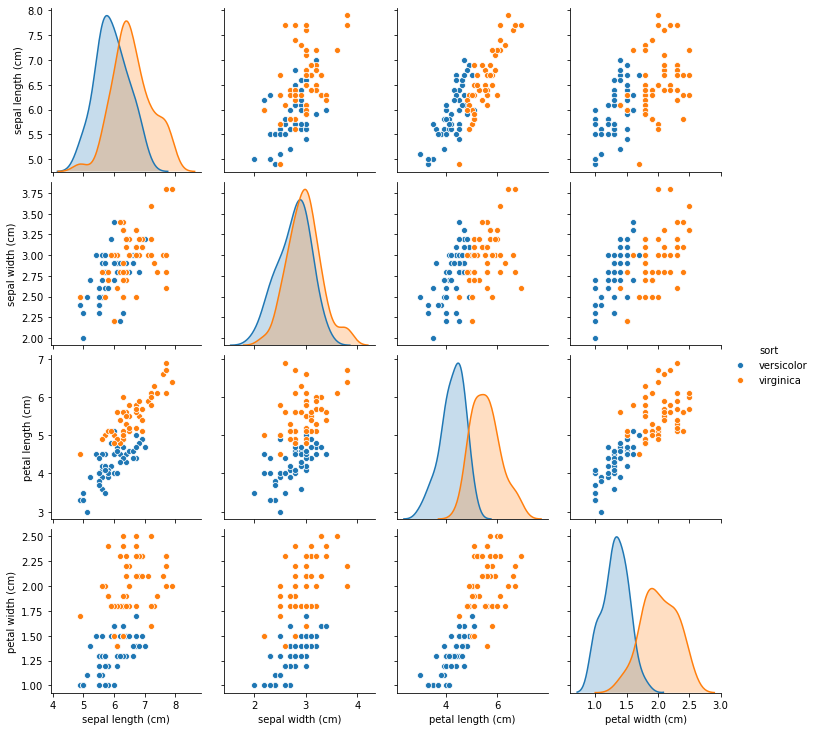

In [4]:
import seaborn as sns
sns.pairplot(iris_df.drop(columns='target'), hue='sort')

Обычный ГС сама

In [1]:
from sklearn.datasets import load_iris
from pandas import DataFrame
iris = load_iris()
iris_df = DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['sort'] = iris_df['target'].apply(lambda x: iris.target_names[x])
iris_df = iris_df.loc[iris_df['target'].isin(['1','2'])]
iris_df['target'] = iris_df['target'].where(iris_df.target==1, other=0)

In [2]:
import numpy as np
from math import exp

dataset = iris_df[['sepal width (cm)', 'petal length (cm)', 'target']].reset_index(drop=True)
dataset = dataset.to_numpy()

learning_rate = 0.3
num_epochs = 100
w = np.random.normal(size=(3,))

for e in range(num_epochs):
    sum_error = 0
    
    for row in dataset:
        yhat = w[0] + w[1]*row[0] + w[2]*row[1]
        yhat = 1 / (1 + exp(-yhat))

        error = row[2] - yhat
        sum_error += error**2
        
        w[0] += learning_rate * error * yhat * (1-yhat)
        w[1] += learning_rate * error * yhat * (1-yhat) * row[0]
        w[2] += learning_rate * error * yhat * (1-yhat) * row[1]

print(round(sum_error,3), w)

3.981 [ 2.19007887  4.70752909 -3.83218312]


СГС сама

In [8]:
from sklearn.datasets import load_iris
from pandas import DataFrame
iris = load_iris()
iris_df = DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['sort'] = iris_df['target'].apply(lambda x: iris.target_names[x])
iris_df = iris_df.loc[iris_df['target'].isin(['1','2'])]
iris_df['target'] = iris_df['target'].where(iris_df.target==1, other=0)

In [9]:
import numpy as np
from math import exp

dataset = iris_df[['sepal width (cm)', 'petal length (cm)', 'target']].reset_index(drop=True)

X = iris_df[['sepal width (cm)', 'petal length (cm)']]
x1 = X.iloc[:,0].reset_index(drop=True)
x2 = X.iloc[:,1].reset_index(drop=True)

y = iris_df.target
y = np.array(y)

learning_rate = 0.3
num_epochs = 100
w = np.random.normal(size=(3,))

sum_error = 0
for e in range(num_epochs):
    i = np.random.choice(len(dataset))
    row = dataset.iloc[i]
    yhat = w[0] + w[1]*row[0] + w[2]*row[1]
    yhat = 1 / (1 + exp(-yhat))

    error = row[2] - yhat
    sum_error += error**2    
    w[0] += learning_rate * error * yhat * (1-yhat)
    w[1] += learning_rate * error * yhat * (1-yhat) * row[0]
    w[2] += learning_rate * error * yhat * (1-yhat) * row[1]

print(round(sum_error,3), w)

26.55 [ 0.81518033  1.05339447 -0.99946795]


СГС по лекции

In [1]:
from sklearn.datasets import load_iris
from pandas import DataFrame
iris = load_iris()
iris_df = DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['sort'] = iris_df['target'].apply(lambda x: iris.target_names[x])
iris_df = iris_df.loc[iris_df['target'].isin(['1','2'])]
iris_df['target'] = iris_df['target'].where(iris_df.target==1, other=0)

In [7]:
import numpy as np
from math import exp

learning_rate = 0.01
point = [0]
num_epochs = 100

X = iris_df[['sepal width (cm)', 'petal length (cm)']].reset_index(drop=True)
x1 = X.iloc[:,0]
x2 = X.iloc[:,1]

y = np.array(iris_df.target)

w = []
w = np.random.normal(size=(3,))

sum_error = 0
for e in range(num_epochs):
    i = np.random.choice(len(X))
    yhat = w[1]*x1[i] + w[2]*x2[i] + w[0]
    #yhat = 1.0 / (1.0 + exp(-(w[1]*x1[i] + w[2]*x2[i] + w[0])))
    
    error = y[i] - yhat
    sum_error += error**2
    
    w[0] -= learning_rate * (yhat - y[i])
    w[1] -= learning_rate * ( (yhat - y[i]) * x1[i])
    w[2] -= learning_rate * ( (yhat - y[i]) * x2[i])
    
print(round(sum_error,3), w)

125.52 [ 0.48006926  0.19854348 -0.14185336]
